In [14]:
import numpy as np
from ultralytics import YOLO
import cv2
import matplotlib.pyplot as plt
import torch
from utils.Detector import Detector
from utils.properties import *
from utils.detect_time import Timer
from utils.make_video import VideoEncoder
from utils.Dataset import FrameExtractor
from utils.fps_conversion import convert_to_5fps
from utils.ROI_drawing import select_roi_from_video
import os
from reid.REID import REID
from tqdm import tqdm
import operator

d:\visitor_dwell_time\visitor-dwell-time\torchreid\metrics\rank.py:11: UserWarning: Cython evaluation (very fast so highly recommended) is unavailable, now use python evaluation.
  warnings.warn(


In [19]:
print("Hello world")

Hello world


In [20]:
import numpy as np

In [21]:
import torch

In [22]:
class Model(torch.nn.Module):
    def __init__(self, input_features):
        super(Model, self).__init__()
        self.linear = torch.nn.Linear(input_features, 1)

    def forward(self, x):
        y_pred = torch.tanh(self.linear(x))
        return y_pred

model = Model(input_features=5)

In [23]:
# Check the input data
x = torch.randn(1, 5)
print(x.shape)

# Check the output of the linear layer
linear_output = model.linear(x)
print(linear_output.shape)

# Check the activation function
activation_output = torch.tanh(linear_output)
print(activation_output.shape)

# Check the model output
y_pred = model(x)
print(y_pred.shape)

torch.Size([1, 5])
torch.Size([1, 1])
torch.Size([1, 1])
torch.Size([1, 1])


In [24]:
from torchvision.models import resnet50

# Load the pre-trained ResNet50 model
model = resnet50()

In [25]:
print(model)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [26]:
for para in model.parameters():
    print(para)

Parameter containing:
tensor([[[[-2.7092e-02, -1.7301e-02, -2.1779e-02,  ..., -2.5698e-02, -3.8287e-02, -2.3719e-02],
          [ 1.5142e-02, -3.8033e-02, -7.9325e-03,  ..., -1.9294e-02,  2.5964e-02,  1.9509e-02],
          [ 3.5548e-02,  1.5264e-02, -1.9956e-02,  ..., -2.4649e-02, -3.1212e-02,  1.3619e-02],
          ...,
          [-2.6495e-02,  5.0648e-03,  6.3253e-02,  ...,  4.5564e-02, -2.1085e-02, -1.4497e-02],
          [ 5.3153e-02,  3.9160e-02, -2.1568e-02,  ...,  2.6369e-02, -4.8501e-02,  3.8166e-03],
          [ 2.7360e-02,  1.2149e-02,  3.1057e-02,  ...,  3.8511e-02, -2.4229e-02, -3.8878e-02]],

         [[-2.2923e-02,  2.1284e-02,  4.4080e-02,  ...,  2.6482e-02,  5.6995e-03,  3.3472e-02],
          [ 3.7610e-02,  1.1817e-02, -1.2643e-02,  ...,  2.4686e-03,  6.3258e-04, -5.1330e-02],
          [ 2.9064e-02, -1.3568e-02,  7.2820e-03,  ...,  1.5357e-02,  3.3642e-02, -1.4429e-02],
          ...,
          [ 2.3028e-02,  2.4342e-02,  2.7891e-03,  ...,  2.7628e-03,  4.0161e-02, 

In [42]:
from PIL import Image

In [47]:
sample_img1=np.array(Image.open("generated_data\data_test\\2_70.jpg"))
sample_img2=np.array(Image.open("generated_data\data_test\\2_33.jpg"))
sample_img3=np.array(Image.open("generated_data\data_test\\1_5.jpg"))

(-0.5, 285.5, 378.5, -0.5)

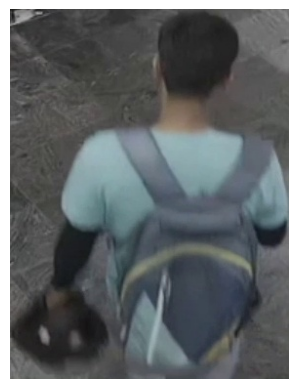

In [65]:
plt.imshow(sample_img3)
plt.axis('off')

In [82]:
from reid.REID import REID

In [83]:
reid=REID(model_path)

Building train transforms ...
+ resize to 256x128
+ random flip
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


AttributeError: 'collections.OrderedDict' object has no attribute 'eval'

In [50]:
imgs=[sample_img1,sample_img2,sample_img3]
f=reid._features(imgs)

In [51]:
f

tensor([[ 1.7951, -2.0063,  0.9494,  ..., -1.3611,  3.2928,  0.5591],
        [ 0.2918, -2.7010,  0.9982,  ..., -2.4146,  1.7686,  1.8753],
        [ 0.7524, -1.8957, -0.5087,  ..., -3.5392, -1.1784,  0.7944]])

In [62]:
input1=f[:1]
input2=f[1:2]
input3=f[2:3]

In [61]:
reid.compute_distance(input1,input2)

d:\visitor_dwell_time\visitor-dwell-time\torchreid\metrics\distance.py:63: UserWarning: This overload of addmm_ is deprecated:
	addmm_(Number beta, Number alpha, Tensor mat1, Tensor mat2)
Consider using one of the following signatures instead:
	addmm_(Tensor mat1, Tensor mat2, *, Number beta, Number alpha) (Triggered internally at ..\torch\csrc\utils\python_arg_parser.cpp:1519.)
  distmat.addmm_(1, -2, input1, input2.t())


array([[     2310.1]], dtype=float32)

In [64]:
print(reid.compute_distance(input1,input3))
print(reid.compute_distance(input2,input3))

[[     6226.1]]
[[     6490.9]]


In [7]:
import argparse
import glob
import os
import sys

import cv2
import numpy as np
import tqdm
from torch.backends import cudnn

sys.path.append('..')



In [16]:
import fastreid

In [28]:
import torch.nn.functional as F

In [38]:
def to_tensor(pic):
    """Convert a ``PIL Image`` or ``numpy.ndarray`` to tensor.

    See ``ToTensor`` for more details.

    Args:
        pic (PIL Image or numpy.ndarray): Image to be converted to tensor.

    Returns:
        Tensor: Converted image.
    """
    if isinstance(pic, np.ndarray):
        assert len(pic.shape) in (2, 3)
        # handle numpy array
        if pic.ndim == 2:
            pic = pic[:, :, None]

        img = torch.from_numpy(pic.transpose((2, 0, 1)))
        # backward compatibility
        if isinstance(img, torch.ByteTensor):
            return img.float()
        else:
            return img

    # handle PIL Image
    if pic.mode == 'I':
        img = torch.from_numpy(np.array(pic, np.int32, copy=False))
    elif pic.mode == 'I;16':
        img = torch.from_numpy(np.array(pic, np.int16, copy=False))
    elif pic.mode == 'F':
        img = torch.from_numpy(np.array(pic, np.float32, copy=False))
    elif pic.mode == '1':
        img = 255 * torch.from_numpy(np.array(pic, np.uint8, copy=False))
    else:
        img = torch.ByteTensor(torch.ByteStorage.from_buffer(pic.tobytes()))
    # PIL image mode: L, LA, P, I, F, RGB, YCbCr, RGBA, CMYK
    if pic.mode == 'YCbCr':
        nchannel = 3
    elif pic.mode == 'I;16':
        nchannel = 1
    else:
        nchannel = len(pic.mode)
    img = img.view(pic.size[1], pic.size[0], nchannel)
    # put it from HWC to CHW format
    # yikes, this transpose takes 80% of the loading time/CPU
    img = img.transpose(0, 1).transpose(0, 2).contiguous()
    if isinstance(img, torch.ByteTensor):
        return img.float()
    else:
        return img

In [66]:
class DefaultPredictor:
    def __init__(self, model_path):
        self.model=resnet50()
        self.model.state_dict(torch.load(model_path))
        self.model.eval()

        

    def __call__(self, image):
        """
        Args:
            image (torch.tensor): an image tensor of shape (B, C, H, W).
        Returns:
            predictions (torch.tensor): the output features of the model
        """
        inputs = {"images": image}
        with torch.no_grad():  # https://github.com/sphinx-doc/sphinx/issues/4258
            predictions = self.model(inputs)
            # Normalize feature to compute cosine distance
            features = F.normalize(predictions)
            features = features.cpu().data
            return features


In [108]:
import torchvision.transforms as T

In [110]:
from fastreid.utils import visualizer

In [111]:
model_path="models\\resnet_50_pret.pth"

In [112]:
from utils.compute_distance_matrix import compute_distance_matrix
from utils.REID import extract_ids
from PIL import Image

### Working on sample images of c4_v3

In [290]:
c4_path="generated_data\c4_v3"
images_path=[os.path.join(c4_path,img_name) for img_name in os.listdir(c4_path)]
image_array=[np.array(Image.open(img_path)) for img_path in images_path]

In [291]:
images_names=os.listdir(c4_path)

In [292]:
from reid.begin import REID

In [293]:
predictor=DefaultPredictor(model_path)

d:\visitor_dwell_time\visitor-dwell-time\.venv\Lib\site-packages\torch\nn\modules\module.py:1879: UserWarning: Positional args are being deprecated, use kwargs instead. Refer to https://pytorch.org/docs/master/generated/torch.nn.Module.html#torch.nn.Module.state_dict for details.
  warnings.warn(


In [294]:
redi_obj=REID(model_path)

Building train transforms ...
+ resize to 256x128
+ random flip
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
Building test transforms ...
+ resize to 256x128
+ to torch tensor of range [0, 1]
+ normalization (mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])


In [295]:
from torchreid.utils.feature_extractor import FeatureExtractor
extractor=FeatureExtractor(model_name='resnet50',device='cpu')

Model: resnet50
- params: 23,508,032
- flops: 2,669,150,208


In [296]:
from utils.REID.extract_ids import extract_ids

In [297]:
all_features=extractor(image_array)

In [298]:
all_features=all_features.numpy()

In [300]:
cam_ids=[]
track_ids=[]


In [301]:
for fname in images_names:
    cid,tid,_=extract_ids(fname)
    cam_ids.append(cid)
    track_ids.append(tid)

In [302]:
cam_ids=np.array(cam_ids)
track_ids=np.array(track_ids)

In [304]:
length=len(cam_ids)
len(cam_ids),len(track_ids),len(all_features),len(images_path)

(730, 730, 730, 730)

In [385]:
shuffled_indices = np.random.permutation(length)
features=all_features[shuffled_indices]
track_ids=track_ids[shuffled_indices]
cam_ids=cam_ids[shuffled_indices]


In [386]:
shuff_paths=np.array(images_path)[shuffled_indices]
shuff_paths

array(['generated_data\\c4_v3\\c4_1_56.jpg', 'generated_data\\c4_v3\\c4_13_479.jpg', 'generated_data\\c4_v3\\c4_11_432.jpg', 'generated_data\\c4_v3\\c4_14_487.jpg', 'generated_data\\c4_v3\\c4_10_195.jpg', 'generated_data\\c4_v3\\c4_13_458.jpg', 'generated_data\\c4_v3\\c4_11_384.jpg',
       'generated_data\\c4_v3\\c4_6_129.jpg', 'generated_data\\c4_v3\\c4_11_419.jpg', 'generated_data\\c4_v3\\c4_11_317.jpg', 'generated_data\\c4_v3\\c4_5_89.jpg', 'generated_data\\c4_v3\\c4_6_163.jpg', 'generated_data\\c4_v3\\c4_1_57.jpg', 'generated_data\\c4_v3\\c4_11_313.jpg',
       'generated_data\\c4_v3\\c4_11_400.jpg', 'generated_data\\c4_v3\\c4_14_499.jpg', 'generated_data\\c4_v3\\c4_16_596.jpg', 'generated_data\\c4_v3\\c4_11_270.jpg', 'generated_data\\c4_v3\\c4_11_413.jpg', 'generated_data\\c4_v3\\c4_6_100.jpg', 'generated_data\\c4_v3\\c4_16_668.jpg',
       'generated_data\\c4_v3\\c4_14_507.jpg', 'generated_data\\c4_v3\\c4_11_349.jpg', 'generated_data\\c4_v3\\c4_16_633.jpg', 'generated_data\\c4_v

In [387]:
num_query=10

In [388]:
q_feat = torch.tensor(features[:num_query])
g_feat = torch.tensor(features[num_query:])
q_track_ids = np.asarray(track_ids[:num_query])
g_track_ids = np.asarray(track_ids[num_query:])
q_cam_ids = np.asarray(cam_ids[:num_query])
g_cam_ids = np.asarray(cam_ids[num_query:])

In [389]:
q_paths=np.array(shuff_paths[:num_query])
g_paths=np.array(shuff_paths[num_query:])

In [390]:
q_feat.shape,g_feat.shape

(torch.Size([10, 2048]), torch.Size([720, 2048]))

In [391]:
q_track_ids,g_track_ids

(array(['14', '6', '16', '5', '6', '16', '11', '11', '1', '14'], dtype='<U2'),
 array(['11', '11', '6', '13', '4', '6', '11', '13', '13', '12', '13', '5', '6', '16', '11', '13', '13', '11', '14', '14', '13', '1', '6', '6', '6', '10', '14', '6', '6', '11', '16', '16', '13', '11', '11', '11', '12', '6', '11', '3', '1', '11', '11', '6', '16', '1', '10', '12', '16', '16', '6', '16', '14', '1', '12',
        '1', '11', '6', '11', '1', '1', '14', '14', '12', '6', '5', '14', '11', '6', '14', '11', '11', '3', '12', '14', '11', '12', '1', '16', '11', '16', '11', '12', '13', '11', '1', '13', '16', '3', '3', '16', '11', '11', '11', '6', '11', '12', '6', '16', '11', '16', '11', '14', '12', '1', '11', '11', '16', '16',
        '11', '10', '6', '11', '11', '1', '12', '16', '11', '11', '11', '11', '11', '16', '14', '11', '11', '4', '16', '1', '11', '16', '14', '13', '12', '1', '6', '6', '13', '11', '14', '11', '11', '11', '6', '11', '12', '11', '11', '1', '11', '13', '14', '16', '11', '1', '11', '11'

In [392]:
from utils.compute_distance_matrix import compute_distance_matrix
dist_mat=compute_distance_matrix(q_feat,g_feat,metric="cosine")
dist_mat.numpy()

array([[    -373.87,     -339.23,     -412.27, ...,     -328.11,        -409,     -283.97],
       [    -330.91,     -300.19,     -280.09, ...,     -301.29,     -318.44,     -289.96],
       [    -427.86,     -373.82,     -344.39, ...,     -404.36,     -420.46,     -411.67],
       ...,
       [    -423.39,     -410.09,     -324.26, ...,      -344.6,     -387.36,     -316.63],
       [    -547.04,     -443.04,     -383.24, ...,     -440.62,     -486.09,     -448.72],
       [    -429.22,      -383.1,     -346.19, ...,     -391.15,      -420.9,     -409.91]], dtype=float32)

In [393]:
new_mat=np.argsort(dist_mat,axis=1)
new_mat

tensor([[539, 466, 412,  ..., 598, 538,  37],
        [ 53, 497,  50,  ..., 230, 438, 538],
        [ 53, 497, 321,  ..., 430, 105, 290],
        ...,
        [528, 327, 499,  ..., 105, 290,  37],
        [709, 533, 435,  ..., 105, 430, 290],
        [ 53, 657, 533,  ..., 105, 290,  37]])

In [394]:
ind=np.argmin(dist_mat,axis=1)
ind

tensor([539,  53,  53, 412, 466, 181, 576, 528, 709,  53])

In [395]:
g_track_ids[ind],q_track_ids

(array(['14', '1', '1', '12', '11', '16', '6', '12', '13', '1'], dtype='<U2'),
 array(['14', '6', '16', '5', '6', '16', '11', '11', '1', '14'], dtype='<U2'))

In [396]:
def accuracy(q_track_ids,g_track_ids,dist_mat):
    ind=np.argmin(dist_mat,axis=1)
    correct_vals=np.sum(g_track_ids[ind]==q_track_ids)
    return correct_vals/len(q_track_ids)


In [397]:
accuracy(q_track_ids,g_track_ids,dist_mat)

0.2

In [398]:
dist_mat=dist_mat.numpy()

In [324]:
from torchreid.utils.reidtools import visualize_ranked_results

In [326]:
query=(q_paths,q_track_ids,np.array(cam_ids[:num_query]))
gallery=(g_paths,g_track_ids,np.array(cam_ids[num_query:]))

In [232]:
from fastreid.utils.visualizer import Visualizer
from torchreid.metrics.rank import evaluate_rank,eval_market1501

In [ ]:
cmc,mAP=eval_market1501(distmat=dist_mat,q_pids=q_track_ids,
                      g_pids=g_track_ids,q_camids=q_cam_ids,
                      g_camids=g_cam_ids,max_rank=10)

In [9]:
from utils.Deepsort import DetectionTracking
from PIL import Image
import numpy as np



In [8]:
path="RLCAFTCONF-C2_107274.jpeg"
tracker=DetectionTracking(model_path="models\yolov8n (1).pt")

TypeError: DetectionTracking() takes no arguments